In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import os

In [ ]:
ruta = os.getcwd()+'\imagesLatex'
Max_level = 255
img = io.imread(ruta + '\powerBank.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()
img.shape

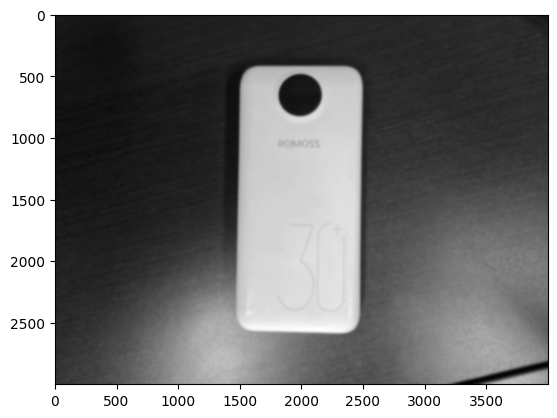

In [111]:
#Aplicando filtro gaussiano para ensayar
d = 51
img_g00 = cv.GaussianBlur(img,(d,d), 0)
plt.imshow(img_g00, cmap='gray')

 th = 170


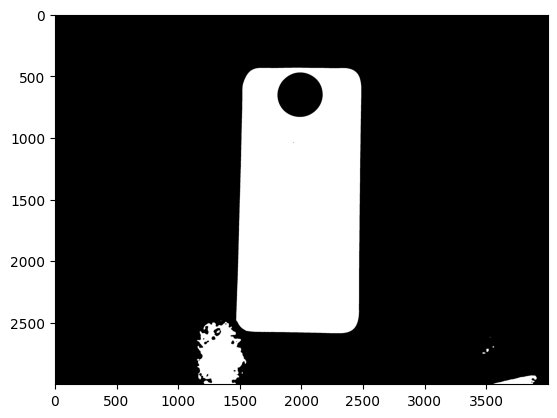

In [13]:
th1 = 170
_, seg1 = cv.threshold(img_g00, th1, Max_level, cv.THRESH_BINARY)
print(' th = '+ str(th1))
plt.imshow(seg1, cmap='gray')
plt.show()

In [ ]:
#Calculando el histograma con la imagen suavizada con el filtro gaussiano

hist = cv.calcHist([img_g00], [0], None, [256], [0, 256])
plt.plot(hist)

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()


In [ ]:
# calculando el umbral usando otsu

th2,seg2 = cv.threshold(img_g00,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
_, seg1 = cv.threshold(img_g00, th2, Max_level, cv.THRESH_BINARY)
print(' th = '+ str(th2))
plt.imshow(seg1, cmap='gray')
plt.show()

In [80]:
# Para esta caso no vamos a usar otsu porque eno entrego tan buenos resultados.

(totalLabels, label_ids, values, centroid) = cv.connectedComponentsWithStats( seg1, 4 , cv.CV_32S)

print( totalLabels )
print( label_ids.shape )  
print( values ) # informacion de interes,  retorna coordenada top, revisar aca = https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#gac7099124c0390051c6970a987e7dc5c5
print( centroid )


12
(3000, 4000)
[[      0       0    4000    3000 9876489]
 [   1470     435    1015    2153 1971986]
 [   1344    2484       5       7      22]
 [   1153    2495     399     505  136788]
 [   1311    2564      26      23     408]
 [   3529    2618       4       6      20]
 [   3550    2694      13      11     113]
 [   3499    2713      20      27     434]
 [   3467    2742      26      12     228]
 [   1514    2902       9      14      97]
 [   1158    2916       1       2       2]
 [   3559    2930     350      70   13413]]
[[2008.83454839 1467.37347361]
 [1986.14840115 1561.48656532]
 [1346.18181818 2486.86363636]
 [1337.90276925 2769.5138828 ]
 [1323.875      2575.31127451]
 [3530.35       2620.6       ]
 [3555.94690265 2698.83185841]
 [3508.48387097 2725.31336406]
 [3479.02192982 2748.25877193]
 [1518.28865979 2909.25773196]
 [1158.         2916.5       ]
 [3772.02117349 2972.92775665]]


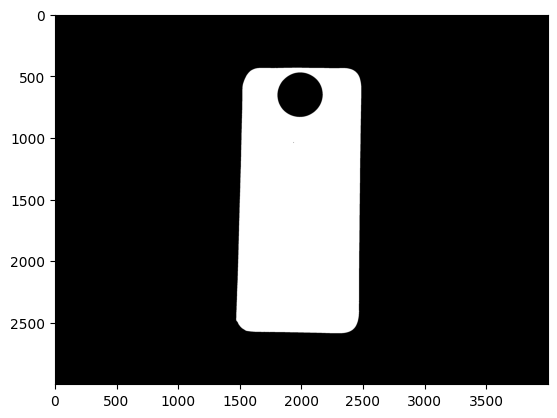

In [104]:
# encontrar la imagen cuyos valores son mas grandes
labelImagen = 1
imagenObjetivo = (label_ids == labelImagen)
plt.imshow(imagenObjetivo, cmap='gray' )
plt.show()

In [133]:
#buscando el area de la powerbank

buscarAreas = []
for x in values :
    buscarAreas.append( x[4])
    
buscarAreas = np.array(buscarAreas)
print(buscarAreas)
# OrdenarAreas = np.sort(buscarAreas)[::-1]
# # El segundo valormás grande es el elemento en la posición 1 (la segunda posición)
# encontrarAreaDeInteres= sorted_arr[1]

print

[9876489 1971986      22  136788     408      20     113     434     228
      97       2   13413]


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

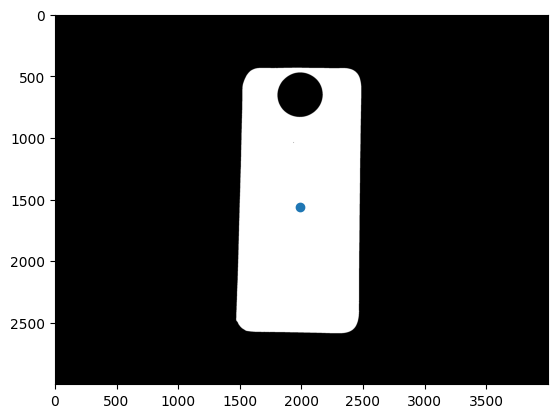

In [110]:
#agregar el centroide
coordenadasCentroide = centroid[labelImagen]

plt.scatter(1986, 1561)

# imagenObjetivo[ 1986, 1561] = True
plt.imshow(imagenObjetivo, cmap='gray' )
plt.show()